In [11]:
from datasets import load_dataset

ds = load_dataset("limingcv/MultiGen-20M_depth_eval", cache_dir='/workspace/home/jovyan/shares/SR006.nfs2/konovalova')

In [12]:
ds

DatasetDict({
    validation: Dataset({
        features: ['image', 'control_depth', 'text'],
        num_rows: 5000
    })
})

In [14]:
from tqdm import tqdm
test_path = '../test_depth_im'
for i in tqdm(range(len(ds['validation']))):
    image = ds['validation'][i]['image'].convert('RGB')
    image.save(f'{test_path}/{i}.png')


100%|██████████| 5000/5000 [09:08<00:00,  9.12it/s]


In [27]:
import numpy as np
import matplotlib.pyplot as plt

im = np.load('labels.npy')



FileNotFoundError: [Errno 2] No such file or directory: 'labels.npy'

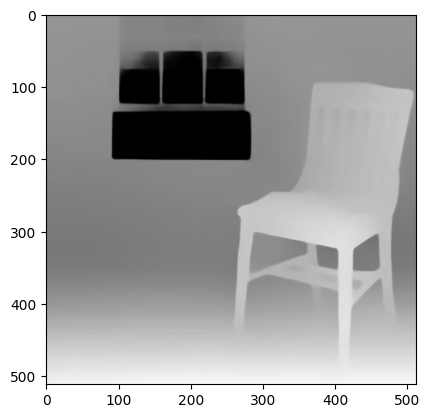

In [20]:
plt.imshow(im[2].astype('float').transpose(1,2,0))

In [21]:
im.min(), im.max()

(np.float16(0.0), np.float16(1.0))

In [28]:
import torch
im = torch.load('labels.pt')

pred = torch.load('pred.pt').detach().cpu()



/tmp/ipykernel_1020979/3578156302.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  im = torch.load('labels.pt')
/tmp/ipykernel_1020979/3578156302.py:4: FutureWarning: You

In [35]:
obs_feat = torch.load('obs.pt').detach().cpu()

/tmp/ipykernel_1020979/2496174597.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  obs_feat = torch.load('obs.pt').detach().cpu()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8208008..0.53515625].


0.0 0.996
tensor(-0.9722, dtype=torch.float16) tensor(0.7412, dtype=torch.float16)


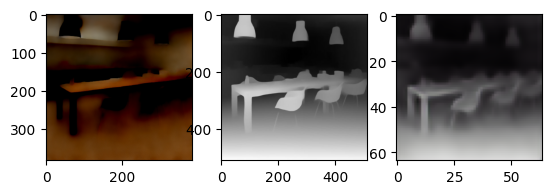

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9746094..1.0].


0.0 1.0
tensor(-0.9990, dtype=torch.float16) tensor(0.8872, dtype=torch.float16)


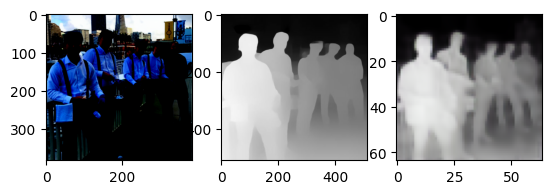

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.86328125..0.97558594].


0.0 0.9805
tensor(-0.9761, dtype=torch.float16) tensor(0.7036, dtype=torch.float16)


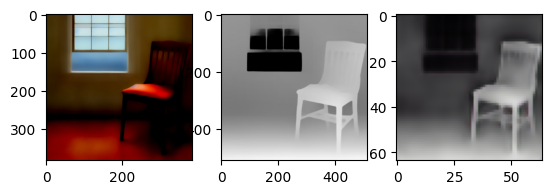

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


0.0 1.0
tensor(-0.9951, dtype=torch.float16) tensor(0.8584, dtype=torch.float16)


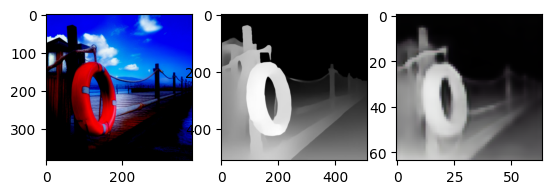

In [26]:
for i, p in enumerate(pred):
    fig, axs = plt.subplots(1,3)
    axs[0].imshow(p.permute(1,2,0).float())
    axs[1].imshow(torch.from_numpy(im[i]).permute(1,2,0).float())
    axs[2].imshow((obs_feat[i].float() + 1) / 2)
    print(im[i].min(), im[i].max())
    print(obs_feat[i].min(), obs_feat[i].max())
    plt.show()

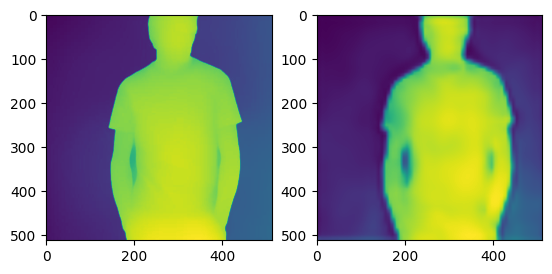

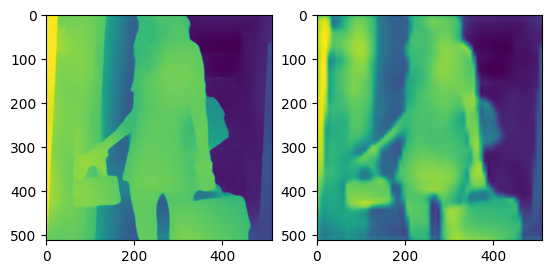

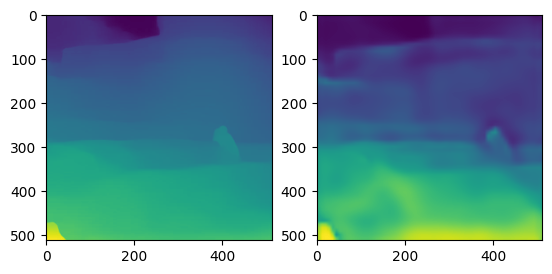

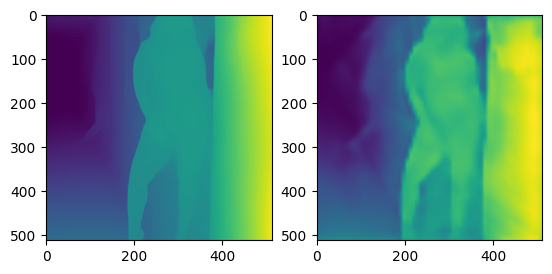

In [36]:
for i, p in enumerate(pred):
    fig, axs = plt.subplots(1,2)
    
    axs[0].imshow(im[i].float().cpu())
    axs[1].imshow(obs_feat[i].cpu().float())
    
    plt.show()

In [1]:
path_0 = '/home/jovyan/konovalova/controlnet_redout/MultiGen_correct/reward_controlnet_sd15_depth_res512_bs256_lr1e-5_warmup100_scale-1.0_iter10k_fp16_train0-1k_reward0-200_mse-loss_920_step_agregation_train/checkpoint-1000'

path_1 = '/home/jovyan/konovalova/controlnet_redout/MultiGen_correct/reward_controlnet_sd15_depth_res512_bs256_lr1e-5_warmup100_scale-1.0_iter10k_fp16_train0-1k_reward0-200_mse-loss_920_step_agregation_train/checkpoint-5000'

In [3]:
import torch
cw_0 = torch.load(f'{path_0}/aggregation/model.ckpt')
cw_1 = torch.load(f'{path_1}/aggregation/model.ckpt')

/tmp/ipykernel_98694/2774465718.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cw_0 = torch.load(f'{path_0}/aggregation/model.ckpt')
/tmp/ipykernel_98694/2774465718.py:

In [9]:
def compare_state_dicts_with_missing_keys(state_dict1, state_dict2, tolerance=1e-2):
    keys1 = set(state_dict1.keys())
    keys2 = set(state_dict2.keys())

    missing_in_1 = keys2 - keys1
    missing_in_2 = keys1 - keys2

    if missing_in_1:
        print(f"Keys missing in state_dict1: {missing_in_1}")
    if missing_in_2:
        print(f"Keys missing in state_dict2: {missing_in_2}")

    common_keys = keys1 & keys2
    for key in common_keys:
        if not torch.allclose(state_dict1[key], state_dict2[key], atol=tolerance):
            print(f"Tensors for key '{key}' are not equal within the tolerance level.")
            #return False

    print("State dictionaries are identical within the tolerance level for common keys.")
    return True

# Compare the state dictionaries with handling for missing keys
are_identical_with_missing_keys = compare_state_dicts_with_missing_keys(cw_0, cw_1)


Tensors for key 'bottleneck_layers.10.conv1.norm.bias' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.11.conv3.norm.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.1.shortcut.norm.bias' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.11.conv3.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.9.shortcut.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.6.shortcut.norm.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.9.emb_layers.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.10.conv2.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.10.conv1.norm.weight' are not equal within the tolerance level.
Tensors for key 'bottleneck_layers.5.emb_layers.weight' are not equal within the tolerance level.
Tensors for key 'bottlene

In [4]:
import wandb
import matplotlib.pyplot as plt
import os

# Initialize WandB API
api = wandb.Api()

# List of run IDs
run_ids = [os.listdir("/home/jovyan/konovalova/controlnet_redout/wandb/")[0]]
print(run_ids)
# Fetch the runs
runs = [api.run(f"/home/jovyan/konovalova/controlnet_redout/wandb/{run_id}") for run_id in run_ids]

# Plotting example
for run in runs:
    history = run.history()
    plt.plot(history['_step'], history['accuracy'], label=run.id)

plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Steps')
plt.show()

['run-20241225_012538-k03sa5qj']
True


CommError: Could not find run <Run home/jovyan/run-20241225_012538-k03sa5qj (not found)>

In [3]:
!wandb logout

Usage: wandb [OPTIONS] COMMAND [ARGS]...
Try 'wandb --help' for help.

Error: No such command 'logout'.


In [ ]:
abdcf58f78a01e8af1e721883a04e6ff840ade5e

In [2]:
import wandb
import os
import matplotlib.pyplot as plt

# Set WandB to offline mode
#os.environ["WANDB_MODE"] = "offline"

# Path to the directory containing the WandB log files
directory_path = 'wandb/run-20250111_045755-qhux0o2f'

# List all files in the directory
files = os.listdir(directory_path)

# Filter out the WandB log files
wandb_files = [f for f in files if f.endswith('.wandb')]

# Load the runs
runs = []
for wandb_file in wandb_files:
    run_path = os.path.join(directory_path, wandb_file)
    run = wandb.init(project="local_project", id=wandb_file.split('-')[1].split('.')[0])
    runs.append(run)

# Plotting example
runs[0]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: nina-konovalova-k (nina-konovalova-k-a). Use `wandb login --relogin` to force relogin


In [13]:
runs

In [15]:
run = wandb.Api().run(run_path)

True


CommError: Could not find run <Run home/jovyan/run-qhux0o2f.wandb (not found)>

In [11]:
import torch
import matplotlib.pyplot as plt


labels = torch.load('labels.pt').cpu().detach()
obs_feat = torch.load('obs_feat.pt').cpu().detach()
obs_feat_normed = torch.load('obs_feat_normed.pt').cpu().detach()

tensor(0.0217)


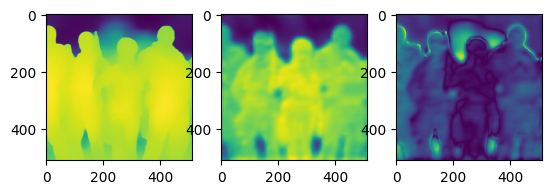

tensor(0.0111)


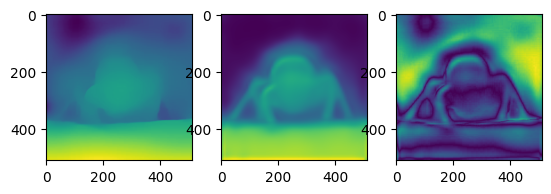

tensor(0.0026)


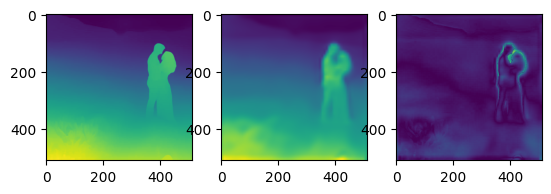

tensor(0.0243)


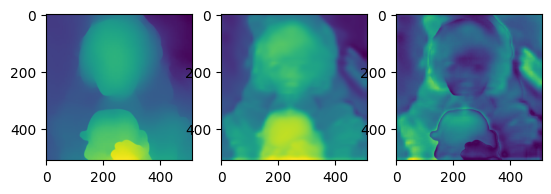

In [13]:
for i in range(len(labels)):
    fig, axs = plt.subplots(1, 3)
    axs[0].imshow(labels[i])
    #axs[1].imshow(obs_feat[i])
    axs[1].imshow(obs_feat_normed[i])
    #axs[3].imshow((labels - obs_feat)[i].abs())
    axs[2].imshow((labels - obs_feat_normed)[i].abs())
    #print(torch.nn.functional.mse_loss(labels[i], obs_feat[i]))
    print(torch.nn.functional.mse_loss(labels[i], obs_feat_normed[i]))
    plt.show()
